# Talent Management Data Analysis

## Introduction
This project involves an exploratory data analysis (EDA) of a talent management dataset, which includes data on employees, their performance, and capacity.
The goal of this analysis is to uncover insights that can inform talent management strategies and decision-making processes.

## Dataset Description


The dataset consists of information from various sources:
- **Employee Data**: Contains columns such as `ID`, `start_date`, `age`, `gender`, `work_location`, and `years_of_service`.
- **Performance Data**: Includes columns like `ID`, `performance_score`, and `period`.
- **Capacity Data**: Covers columns such as `ID`, `job_role`, `capacity_score`, `assessment_result`, and `period`.

The analysis begins by loading and understanding these datasets.

## `Libraries`

In [1]:
# python version
from platform import python_version
print("python", python_version())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library version
print(pd.__name__,pd.__version__)
print(np.__name__,np.__version__)
print(sns.__name__,sns.__version__)

python 3.10.12
pandas 2.1.4
numpy 1.26.4
seaborn 0.13.1


## Data Loading and Preprocessing

In [2]:
# data parsing
df_empl = pd.read_excel("/content/employee_data.xlsx")
df_perf = pd.read_excel("/content/performance_data.xlsx")
df_capa = pd.read_excel("/content/capacity_data.xlsx")

# data info
df_empl.info()
df_perf.info()
df_capa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1584 non-null   int64         
 1   start_date        1584 non-null   datetime64[ns]
 2   age               1584 non-null   int64         
 3   gender            1584 non-null   object        
 4   work_location     1584 non-null   object        
 5   years_of_service  1584 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 74.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1584 non-null   int64
 1   performance  1584 non-null   int64
 2   period       1584 non-null   int64
dtypes: int64(3)
memory usage: 37.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeInde

In [3]:
# handling missing values (if there's any)
df_empl['age'].fillna(df_empl['age'].mean(), inplace=True)
df_perf.dropna(subset=['performance'], inplace=True)

Checking any outlier in `age` to see if there's any abnormalities in employee data
> This allows us to proceed confidently with further analysis, knowing that age-related anomalies are not a concern in our dataset.



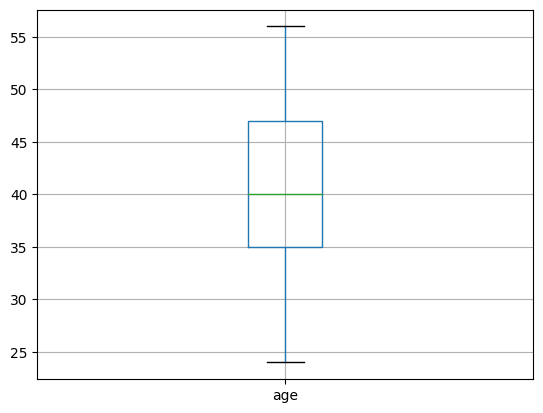

In [4]:
# checking for outlier with boxplot
df_empl.boxplot(column=['age'])
plt.show()

maximum and minimum `age` match the endpoints of the whiskers with no additional points beyond them, so there are no outliers in this dataset according to the standard 1.5 * IQR rule

In [5]:
# calculate outlier
Q1 = df_empl['age'].quantile(0.25)
Q3 = df_empl['age'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :",Q1,"| Q3 :",Q3,"| IQR :",IQR)

min_IQR = Q1 - 1.5*IQR
max_IQR = Q3 + 1.5*IQR
print("min_IQR :",min_IQR,"| max_IQR :",max_IQR)

print("Maximum age :", df_empl['age'].max())
print('Minimum age :',df_empl['age'].min())

Q1 : 35.0 | Q3 : 47.0 | IQR : 12.0
min_IQR : 17.0 | max_IQR : 65.0
Maximum age : 56
Minimum age : 24


> The boxplot analysis of the age variable shows no outliers, indicating a consistent and normal distribution of employee ages across the company. This suggests that the workforce is age-balanced, with no extreme age-related cases that could influence the overall analysis.

In [6]:
# some variables description
print(df_perf['performance'].describe())
print(df_capa['capacity_score'].describe())

count    1584.000000
mean        3.792298
std         0.739921
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: performance, dtype: float64
count    1584.000000
mean        3.644571
std         0.752714
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: capacity_score, dtype: float64


In [7]:
# join all the dataframes
df_merge = pd.merge(df_empl,df_perf, on="ID").merge(df_capa, on="ID")

# rename columns
df_merge.rename(columns={'period_x' : 'performance_year', 'period_y' : 'capacity_year'}, inplace=True)

# change data type
df_merge['ID'] = df_merge['ID'].astype(str)

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 1584 non-null   object        
 1   start_date         1584 non-null   datetime64[ns]
 2   age                1584 non-null   int64         
 3   gender             1584 non-null   object        
 4   work_location      1584 non-null   object        
 5   years_of_service   1584 non-null   int64         
 6   performance        1584 non-null   int64         
 7   performance_year   1584 non-null   int64         
 8   job_role           1584 non-null   object        
 9   capacity_score     1584 non-null   int64         
 10  assessment_result  1584 non-null   object        
 11  capacity_year      1584 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 148.6+ KB


In [8]:
# additional variables #1
df_merge['talent_score'] = (df_merge['performance'] + df_merge['capacity_score'])/2

# aggregation
score_max = df_merge['talent_score'].max()
score_min = df_merge['talent_score'].min()
class_range = score_max / 3

# additional variables (list comprehension) #2
df_merge['talent_class'] = ['low' if x <= class_range else 'mid' if x <= class_range*2 else 'top' for x in df_merge['talent_score']]
df_merge['competency_score'] = [1 if x == 'poor' else 2 if x == 'fair' else 3 for x in df_merge['assessment_result']]
# df_merge['gender_code'] = [1 if x == 'male' else 2 for x in df_merge['gender']]

df_merge.head()

,ID,start_date,age,gender,work_location,years_of_service,performance,performance_year,job_role,capacity_score,assessment_result,capacity_year,talent_score,talent_class,competency_score
0,10001,2000-02-01,54,male,branch,24,4,2023,FINANCIAL,4,excellent,2023,4.0,top,3
1,10002,2000-08-04,54,female,branch,24,4,2023,FINANCIAL,4,excellent,2023,4.0,top,3
2,10003,2000-11-01,54,male,branch,23,4,2023,FINANCIAL,4,excellent,2023,4.0,top,3
3,10004,2006-01-01,54,male,branch,18,4,2023,FINANCIAL,4,excellent,2023,4.0,top,3
4,10005,2005-01-01,54,male,branch,19,4,2023,FINANCIAL,4,excellent,2023,4.0,top,3


## Data Correlation Analysis

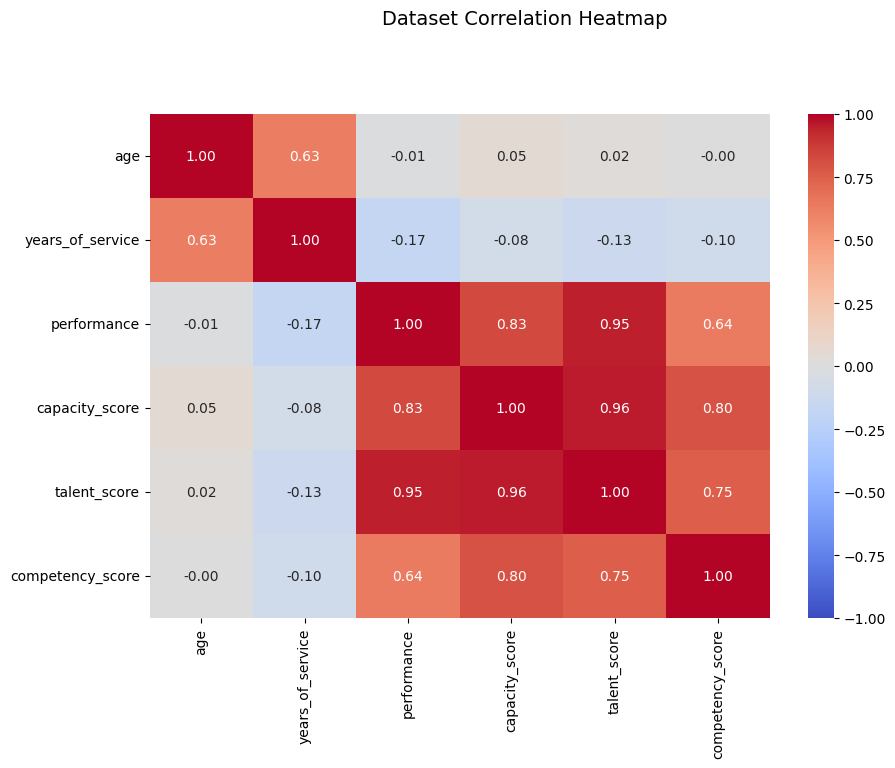

In [9]:
# checking connection between variables
df_var = df_merge[['age', 'years_of_service', 'performance', 'capacity_score', 'talent_score', 'competency_score']]

f, ax = plt.subplots(figsize=(10, 7))
corr = df_var.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1)
f.subplots_adjust(top=0.83)
t= f.suptitle('Dataset Correlation Heatmap', fontsize=14)

**Summary of Relationships :**
* `performance` and `talent_score` are strongly correlated (0.95), indicating they measure similar aspects.
* `capacity_score` and `talent_score` are also highly correlated (0.96), suggesting a close relationship.
* `age` and `years_of_service` are moderately correlated (0.63), as expected due to longer service with age.
* `competency_score` shows moderate correlations with `performance` (0.64), `capacity_score` (0.80), and `talent_score` (0.75), indicating it is reasonably related to these metrics.

In [30]:
# # pairplots of correlated variables #1
# df_merge_pp = df_merge[['competency_score','performance']]
# sns.pairplot(df_merge_pp)

In [29]:
# # pairplots of correlated variables #2
# df_merge_pp = df_merge[['competency_score','capacity_score']].copy()
# sns.pairplot(df_merge_pp)

In [28]:
# # univariate plots
# df_var.hist(bins=15, linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False, edgecolor='white')
# plt.tight_layout(rect=(0,0,2,2))

## Exploratory Data Analysis

### 1. Talent Class Trends Within Company

**Problem Identification:** Investigate how the distribution of employees across different talent classes (e.g., top, middle, low). This can help developing and retaining top talent.

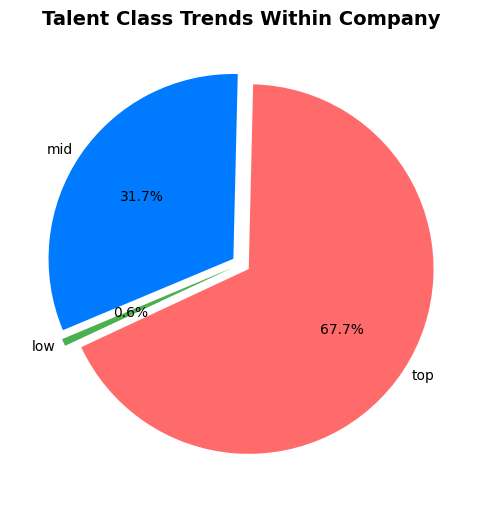

In [34]:
# the number of employees in each talent class - visualization

# Count the occurrences of each talent class
empl_count = df_merge['talent_class'].value_counts()
tale_class = empl_count.index # Extract labels from the value counts

# Create an explode tuple with the same length as the number of talent classes
explode = (0.05,) * len(empl_count)

plt.figure(figsize=(6,6))
plt.pie(
    empl_count,
    labels=tale_class,
    autopct=lambda p: f'{p:.1f}%',
    startangle=205,
    colors=['#FF6B6B', '#007BFF', '#4CAF50'],
    labeldistance=1.05,
    explode=explode, # Use the dynamically created explode tuple
    textprops={'fontsize': 10}
)

plt.title("Talent Class Trends Within Company", fontsize=14, weight= 'bold')
plt.show()

**Recommendations:**
* **Talent Criteria Review:** Regularly review and update the criteria used to classify talent to ensure they are aligned with the company's goals and performance standards.
* **Mid-Talent Development:** Implement targeted development programs for mid-talent employees to help them advance to the top talent category.
* **Support for Low Talent:** Conduct individual assessments of low-talent employees to identify specific issues and develop personalized improvement plans.

### 2. Performance and Capacity Alignment

**Problem Identification:** Assess whether there is alignment between employee performance scores and capacity scores. Misalignment could indicate issues in role suitability or training needs.

In [13]:
print('Correlations with Performance:\n')
df_var[df_var.columns[0:]].corr()['performance'][:].to_frame().sort_values(by=['performance'],ascending=False).round(2)

Correlations with Performance:



,performance
performance,1.00
talent_score,0.95
capacity_score,0.83
competency_score,0.64
age,-0.01
years_of_service,-0.17


**Conclusion:** There is strong alignment between performance and both talent and capacity scores, indicating that the company’s measures for these aspects are effective predictors of employee performance. This suggests that the company is on the right track in identifying and developing talent and capacity among its workforce.

> **Actionable Insight:** The company should continue to invest in and refine its talent and capacity assessment processes, as these are clearly linked to high performance. Additionally, integrating competency development with these factors could further enhance overall employee performance.

### 3. Job Role on Talent Development
**Problem Identification:** Evaluate how different job roles contribute to talent development and overall performance. This can guide the company in designing role-specific training and development programs.

In [37]:
# average performance score in each job role
avg_perf = df_merge.groupby('job_role').agg(average_performance=('performance','mean')).sort_values(by='average_price', ascending=False).reset_index()
avg_perf['average_performance'] = np.round(avg_perf['average_performance']).astype('int64')
avg_perf

,job_role,average_performance
0,PEOPLE,4
1,COMMERCIAL,4
2,OPERATIONAL,4
3,FINANCIAL,4
4,TECHNOLOGY,3


<ipython-input-42-8e6122255855>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='job_role', y='average_performance', data=avg_perf, palette='bright')


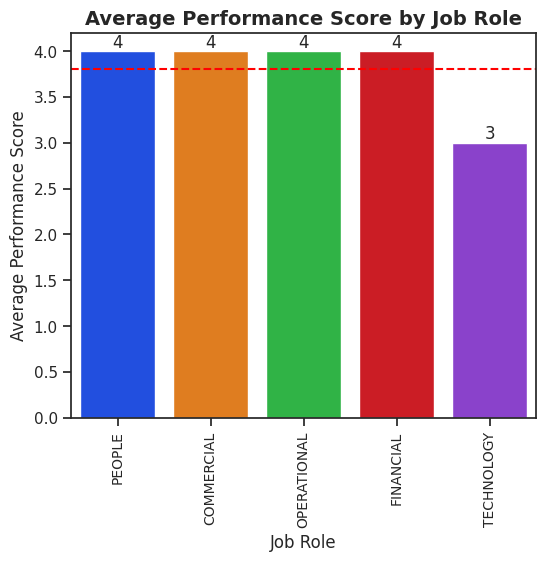

In [42]:
# average performance score in each job role - visualization

# set seaborn style
sns.set(style='ticks')

# create barplot using seaborn
plt.figure(figsize=(6, 5))
ax = sns.barplot(x='job_role', y='average_performance', data=avg_perf, palette='bright')

# add value labels
for p in ax.patches:
  ax. annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'bottom')

# set plot title and labels
plt.title('Average Performance Score by Job Role', fontsize=14, weight='bold')
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Average Performance Score', fontsize=12)

# add an average line
average_performance = np.mean(avg_perf['average_performance'])
plt.axhline(y=average_performance, color='red', linestyle='--', label='Avg')

plt.show()

**Conclusion:** Roles like PEOPLE, COMMERCIAL, and FINANCIAL have high performance scores, suggesting strong alignment with company goals. The TECHNOLOGY role, however, shows a lower average performance score, which may indicate a need for targeted development.
> **Actionable Insight:** Design training programs focused on the Technology department to enhance performance and talent development. For high-performing roles, explore mentoring opportunities where employees in these roles can share best practices.

### Suggested Area for Further Analysis

**Diversity and Inclusion Analysis.** Explore whether there are disparities in performance, capacity, or talent scores based on gender, age, or work location. This can inform diversity and inclusion initiatives within the company.